## Step 1: Importing the Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as stat

%matplotlib inline

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Data Inspection

In [ ]:
# Loading train and test data
df_train = pd.read_csv("train_0OECtn8.csv")
df_test = pd.read_csv("test_1zqHu22.csv")

In [ ]:
# Train and test data shape
print("Shape of train dataset : {}".format(df_train.shape))
print("Shape of test dataset : {}".format(df_test.shape))

In [ ]:
# High level information of train data
df_train.info()

High level information of the train data set :
1. There are 8 numerical attributes and 2 categorical attributes
2. There is no null values/missing values present in any column as Non-Null Count of each column = Total entries

In [5]:
# High level information of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


High level information of the test data set :
1. There are 7 numerical attributes and 2 categorical attributes
2. There is no null values/missing values present in any column as Non-Null Count of each column = Total entries

In [6]:
print("Train data attributes : {}".format(df_train.columns.values))
print("Test data attributes : {}".format(df_test.columns.values))

Train data attributes : ['row_id' 'user_id' 'category_id' 'video_id' 'age' 'gender' 'profession'
 'followers' 'views' 'engagement_score']
Test data attributes : ['row_id' 'user_id' 'category_id' 'video_id' 'age' 'gender' 'profession'
 'followers' 'views']


Finding:
1. engagement_score is target value that we need our model to predict

## Exploratory Data Analysis

In [7]:
# See first 5 rows of train data
df_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [8]:
# Checking unique values count in each attributes
for col in df_train.columns:
    print("Unique values in {} : {}".format(col,len(df_train[col].unique())))

Unique values in row_id : 89197
Unique values in user_id : 27734
Unique values in category_id : 47
Unique values in video_id : 175
Unique values in age : 58
Unique values in gender : 2
Unique values in profession : 3
Unique values in followers : 17
Unique values in views : 43
Unique values in engagement_score : 229


Findings:
1. Row ID values are unique identifier of records. Hence it can be removed.
2. User_ID also uniquely identifies user and it can also be removed as we can not predic anything based on this.
3. We have 47 categories of videos.
4. We have users from 3 different profession.

#### Univariate Analysis

<AxesSubplot:title={'center':'Category wise video count'}, xlabel='category_id', ylabel='count'>

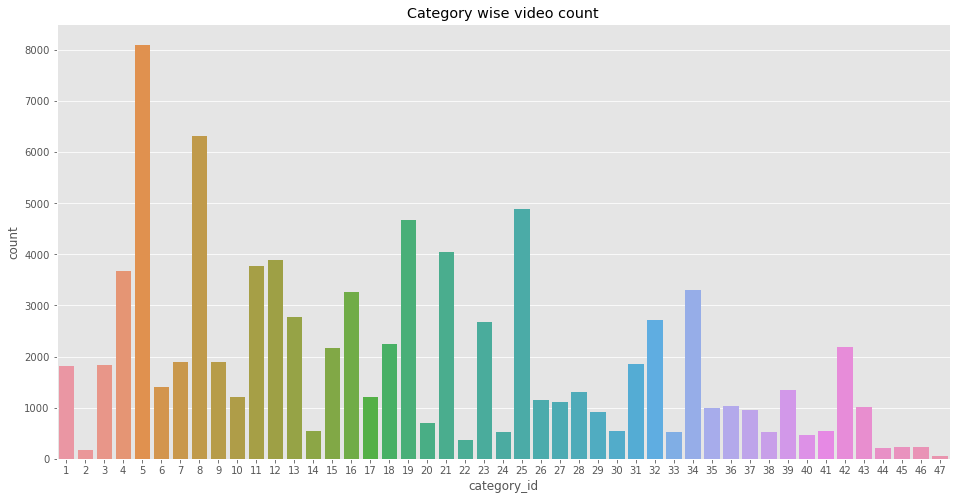

In [9]:
# Category_ID : Will plt bar plot and check videos under each category
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.title("Category wise video count")
sns.countplot(data=df_train,x='category_id')

Finding:
 1. Category = 5 has hieghest number of videos in test data set
 2. Category = 47 has less number of videos in train data set

<AxesSubplot:title={'center':'User age distribution'}, xlabel='age', ylabel='Count'>

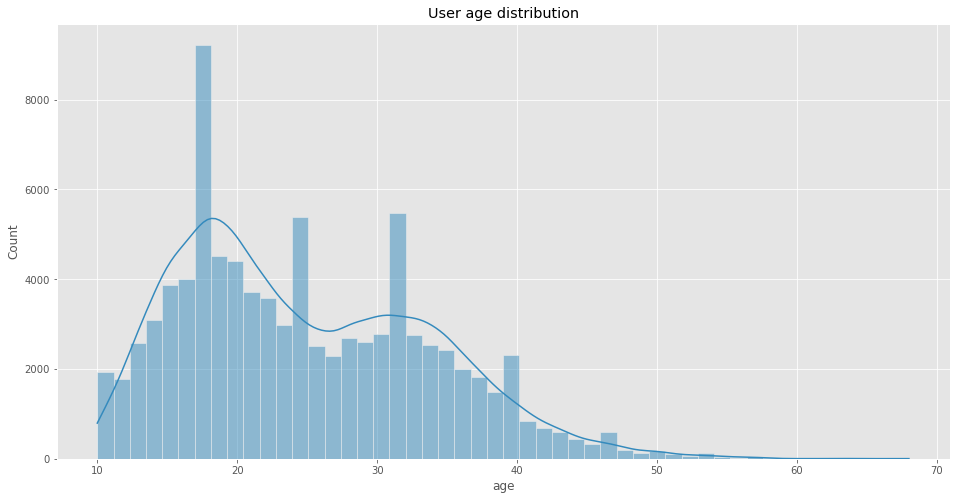

In [10]:
# Age Distribution
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.title("User age distribution")
sns.histplot(df_train.age,kde=True,bins=50)

Findings:
1. We can see there are two peaks in histogram. One around 18 years and another around 32 years. We can think of making two groups as age<=27 and age>27



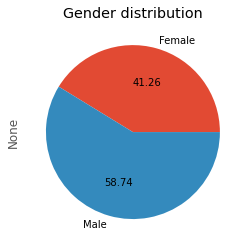

In [11]:
# Gender distibution
plt.style.use('ggplot')
plt.figure(figsize=(4,4))
plt.title("Gender distribution")
df_train.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.show()

Findings:
1. Train data has 58.74% male users and 41.26% female users
1. Total number of male user are more than Female users. But difference is not much.

<AxesSubplot:title={'center':'Profession distribution'}, ylabel='None'>

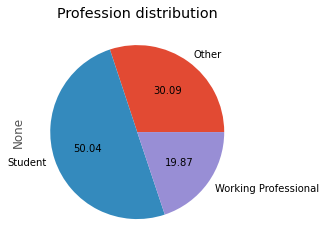

In [12]:
# Gender distibution
plt.style.use('ggplot')
plt.figure(figsize=(4,4))
plt.title("Profession distribution")
df_train.groupby('profession').size().plot(kind='pie', autopct='%.2f')

Findings:
1. Half of the users are Students
2. Working Professional corresponds to 19.87% of total users

<AxesSubplot:title={'center':'Views distribution'}, xlabel='views', ylabel='Count'>

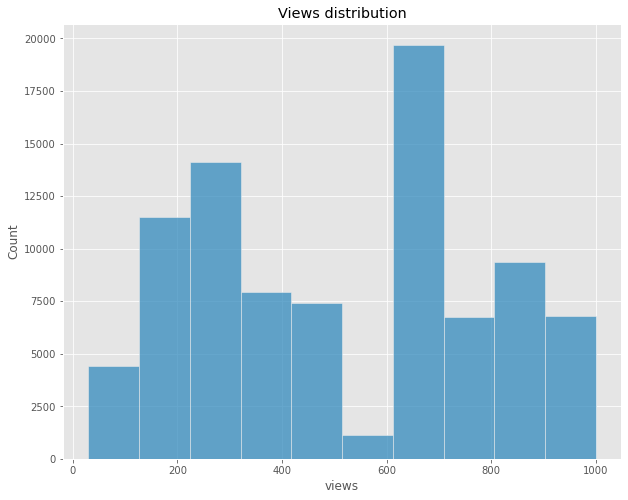

In [13]:
# Views Distribution
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.title("Views distribution")
sns.histplot(df_train.views,bins=10)

Findings:
1. We can see two peaks in views. There are many categories which have total views
   between 200-300 and 600-700

<AxesSubplot:title={'center':'Followers Distribution distribution'}, xlabel='followers', ylabel='Count'>

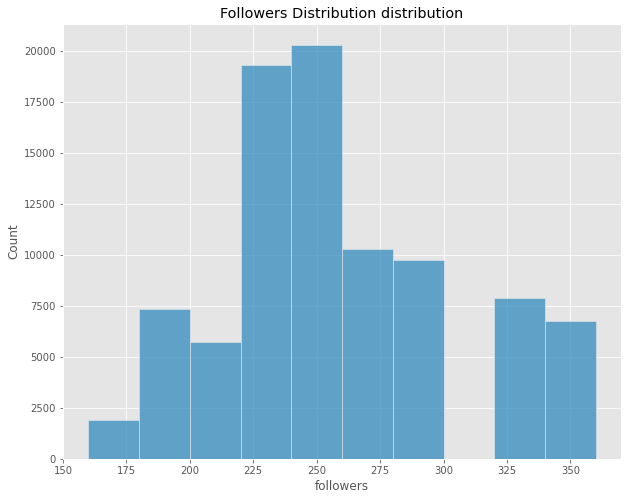

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.title("Followers Distribution distribution")
sns.histplot(df_train.followers,bins=10)

Findings:
1. There are many categories which have total followers between 225 to 275

<AxesSubplot:title={'center':'Engagement Score distribution'}, xlabel='engagement_score', ylabel='Density'>

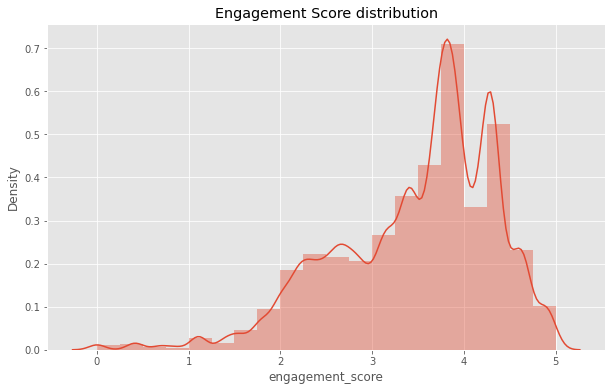

In [15]:
# Diribution of engagement score
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.title("Engagement Score distribution")
sns.distplot(df_train.engagement_score,kde=True,bins=20)

Findings:
1. We can see engagement score distribution is left skewed. 
2. There are few videos whch have engagement score of a user is less than 1.
3. Engagement score less than 1 seems outliers. We can see explore those data and think of removing it.
3. Also we can use transformation to try making in close to normal distribution.

<AxesSubplot:title={'center':'Engagement Score distribution'}, ylabel='engagement_score'>

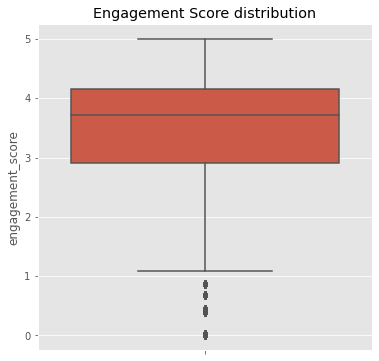

In [16]:
# Box plot to check outliers in engagement_score
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.title("Engagement Score distribution")
sns.boxplot(y=df_train.engagement_score)

Findings:
1. Box Plot clearly shows presence of outliers

#### Bivariate Analysis

In [17]:
# Mean engagement score per category.
mean_engagement_score_per_category = df_train[['category_id','engagement_score']].groupby('category_id').mean().sort_values('engagement_score',ascending=False)
# Views per category
views_per_category = df_train[['category_id','views']].groupby(['category_id','views']).count().sort_values(by='views',ascending=False)
# Followers per category
followers_per_category = df_train[['category_id','followers']].groupby(['category_id','followers']).count().sort_values(by='followers',ascending=False)
# Average age of user per category
age_per_category = df_train[['category_id','age']].groupby('category_id').mean().sort_values(by='age',ascending=False)
# Videos per category
videos_per_category = df_train[['category_id','video_id']].groupby('category_id').count().sort_values(by='video_id',ascending=False)


# Collating all information regarding category_id reated to various other non categorical attributes
import functools
data_frames = [mean_engagement_score_per_category.reset_index(),views_per_category.reset_index(),followers_per_category.reset_index(),age_per_category.reset_index(),videos_per_category.reset_index()]
df_category_analysis = functools.reduce(lambda  left,right: pd.merge(left,right,on=['category_id'],
                                            how='inner'), data_frames)

In [18]:
print("Category having highest average Engagement score : {}".format(df_category_analysis.sort_values('engagement_score',ascending=False).head(1)['category_id'].iloc[0]))
print("Category having highest views : {}".format(df_category_analysis.sort_values('views',ascending=False).head(1)['category_id'].iloc[0]))
print("Category having highest followers : {}".format(df_category_analysis.sort_values('followers',ascending=False).head(1)['category_id'].iloc[0]))
print("Category having highest no of videos : {}".format(df_category_analysis.sort_values('video_id',ascending=False).head(1)['category_id'].iloc[0]))

Category having highest average Engagement score : 43
Category having highest views : 37
Category having highest followers : 1
Category having highest no of videos : 5


In [19]:
df_category_analysis[df_category_analysis.category_id.isin([43,37,1,5])]

,category_id,engagement_score,views,followers,age,video_id
0,43,4.043435,617,280,24.783121,1019
9,1,3.639856,990,360,25.242541,1810
11,5,3.633308,229,240,24.734452,8104
35,37,3.314751,1000,180,24.816008,962


Findings :
1. We have different top categories based on engagement_score,views and followers.
2. Average age across all categories is almost same

<AxesSubplot:title={'center':'Average engagement score per category'}, xlabel='category_id', ylabel='engagement_score'>

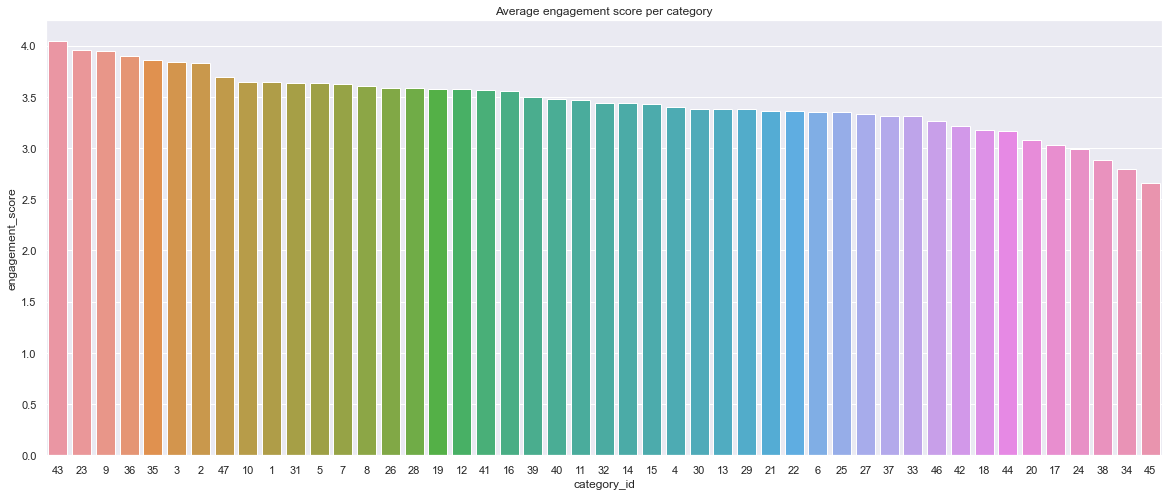

In [20]:
# Plotting Average engagement score per category
sns.set('notebook')
plt.figure(figsize=(20,8))
plt.title("Average engagement score per category")
sns.barplot(x='category_id',y='engagement_score',data=df_category_analysis,order=df_category_analysis.category_id)

Findings:
1. Category 43 has highest engagement score
2. Category 45 has lowest engagement score
3. There can be a chance that number of videos in 43 is less resulting in high everage engagement score.

<AxesSubplot:title={'center':'Videos per category'}, xlabel='category_id', ylabel='video_id'>

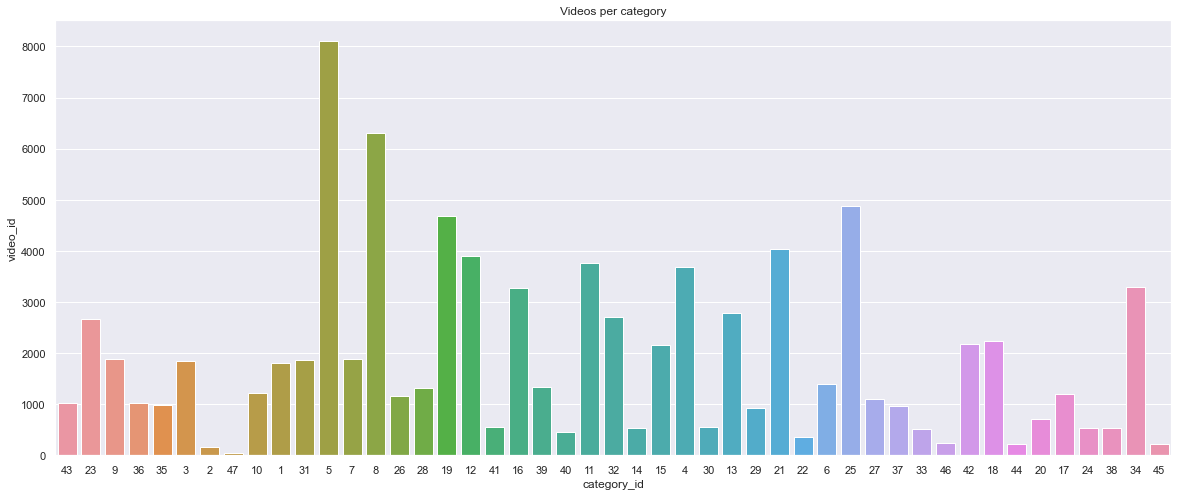

In [21]:
# Plotting no of videos per category
sns.set('notebook')
plt.figure(figsize=(20,8))
plt.title("Videos per category")
sns.barplot(x='category_id',y='video_id',data=df_category_analysis,order=df_category_analysis.category_id)

Findings:
1. Category 5 has highest number of videos.
2. Combining Average Engagement score per category_id and Videos per category we can see category id 43 that has highest average engagement score is actauly having less videos.
3. Also combining both plots cateory_id 5 and 8 have good number videos and same time good engagement score.

<AxesSubplot:title={'center':'Views per Category'}, xlabel='category_id', ylabel='views'>

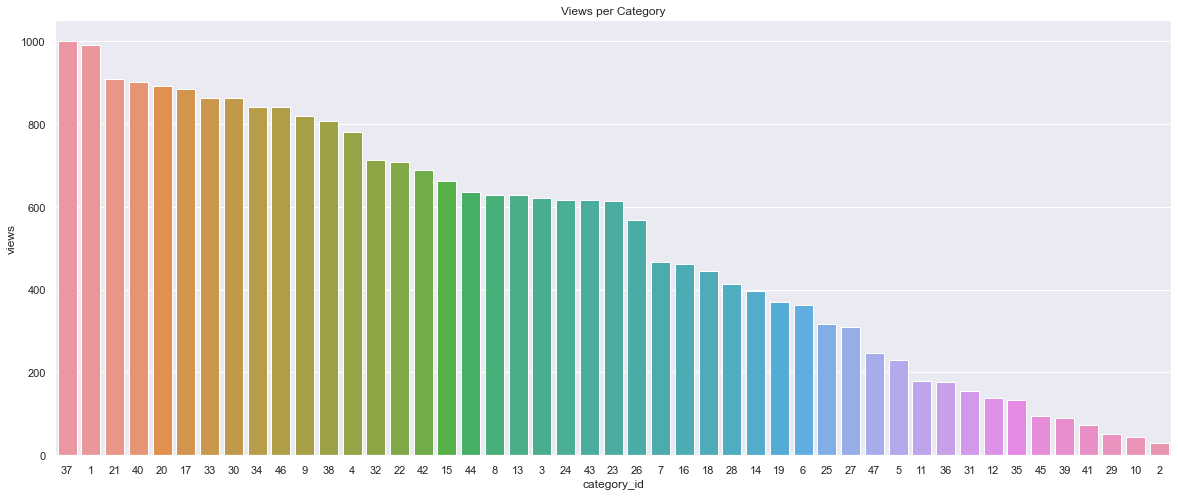

In [22]:
# Plotting Views per Category
sns.set('notebook')
plt.figure(figsize=(20,8))
plt.title("Views per Category")
sns.barplot(x='category_id',y='views',data=df_category_analysis,order=df_category_analysis.sort_values('views',ascending=False).category_id)

<AxesSubplot:title={'center':'Followers per Category'}, xlabel='category_id', ylabel='followers'>

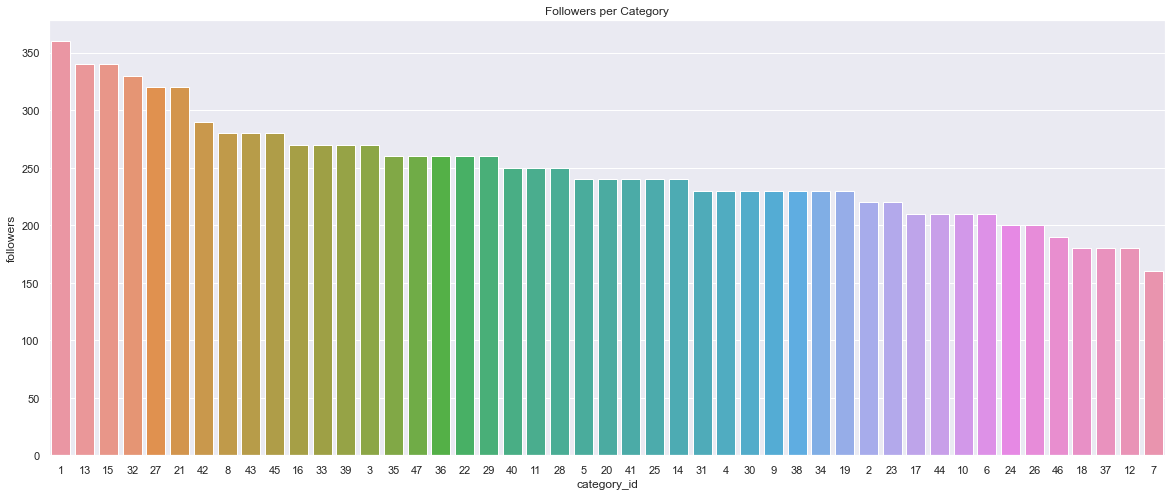

In [23]:
# Plotting Followers per Category
sns.set('notebook')
plt.figure(figsize=(20,8))
plt.title("Followers per Category")
sns.barplot(x='category_id',y='followers',data=df_category_analysis,order=df_category_analysis.sort_values('followers',ascending=False).category_id)

## Data Wrangling

In [104]:
# Loading train and test data
df_train = pd.read_csv("train_0OECtn8.csv")
df_test = pd.read_csv("test_1zqHu22.csv")

In [105]:
# Percent and count of data having engagement score of less than 1
data_lessthan1_eng_score = df_train[df_train['engagement_score'] < 1]['engagement_score'].count()
print("Data points having engagement score of less than 1 : {}".format(data_lessthan1_eng_score))
print("Percent of data having engagement score of less than 1 : {}%".format(round(data_lessthan1_eng_score*100/df_train.shape[0])))

Data points having engagement score of less than 1 : 820
Percent of data having engagement score of less than 1 : 1%


In [106]:
# Filter out data points that have engagement score less than 1
df_train = df_train[df_train['engagement_score'] >= 1]

In [107]:
# Dropping irrelevant attributes
df_train.drop(['row_id','user_id'],axis=1,inplace=True)
df_test.drop(['row_id','user_id'],axis=1,inplace=True)

In [108]:
# Transforming target attribute engagement score using square transformation
df_train['square_engagement_score']= np.square(df_train['engagement_score'])

In [109]:
df_train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score,square_engagement_score
0,37,128,24,Male,Student,180,1000,4.33,18.7489
1,32,132,14,Female,Student,330,714,1.79,3.2041
2,12,24,19,Male,Student,180,138,4.35,18.9225
3,23,112,19,Male,Student,220,613,3.77,14.2129
4,23,112,27,Male,Working Professional,220,613,3.13,9.7969


In [110]:
dummy_df = pd.get_dummies(df_train,columns=['gender','profession'])
feature = pd.concat([dummy_df.iloc[:,-5:],df_train.iloc[:,[0,1,2,5,6]]],axis=1)
label = df_train.square_engagement_score

In [116]:
feature

,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional,category_id,video_id,age,followers,views
0,0,1,0,1,0,37,128,24,180,1000
1,1,0,0,1,0,32,132,14,330,714
2,0,1,0,1,0,12,24,19,180,138
3,0,1,0,1,0,23,112,19,220,613
4,0,1,0,0,1,23,112,27,220,613
...,...,...,...,...,...,...,...,...,...,...
89192,0,1,1,0,0,15,32,25,340,662
89193,0,1,1,0,0,20,47,31,240,892
89194,0,1,0,1,0,16,97,25,270,462
89195,0,1,0,0,1,9,18,35,230,819


In [112]:
label

0        18.7489
1         3.2041
2        18.9225
3        14.2129
4         9.7969
          ...   
89192    15.2881
89193    12.6736
89194    17.8929
89195    14.2129
89196    18.5761
Name: square_engagement_score, Length: 88377, dtype: float64

In [102]:
featureAllIn = np.append(np.ones((88377,1)).astype(int),df_train,axis=1)

In [103]:
featureAllIn

array([[   1,    0,    1, ...,   24,  180, 1000],
       [   1,    1,    0, ...,   14,  330,  714],
       [   1,    0,    1, ...,   19,  180,  138],
       ...,
       [   1,    0,    1, ...,   25,  270,  462],
       [   1,    0,    1, ...,   35,  230,  819],
       [   1,    0,    1, ...,   13,  240,  317]], dtype=int64)

In [114]:
model = stat.OLS(endog=label,exog=featureAllIn).fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     square_engagement_score   R-squared:                       0.275
Model:                                 OLS   Adj. R-squared:                  0.275
Method:                      Least Squares   F-statistic:                     4198.
Date:                     Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                             21:56:39   Log-Likelihood:            -2.5973e+05
No. Observations:                    88377   AIC:                         5.195e+05
Df Residuals:                        88368   BIC:                         5.196e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6850      0.064    105.076      0.000       6.560       6.810
x1             1.2007      0.036     33.454      0.000       1.130       1.271
x2             5.4843      0.035    156.645      0.000       5.416       5.553
x3             1.7721      0.038     46.031      0.000       1.697       1.848
x4             4.6513      0.028    163.292      0.000       4.595       4.707
x5             0.2616      0.042      6.224      0.000       0.179       0.344
x6            -0.0392      0.002    -24.515      0.000      -0.042      -0.036
x7             0.0023      0.000      5.842      0.000       0.001       0.003
x8             0.0050      0.003      1.776      0.076      -0.001       0.011
x9             0.0029      0.000      8.002      0.000       0.002       0.004
x10           -0.0012   6.21e-05    -20.008      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       61.118   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.734
Skew:                          -0.017   Prob(JB):                     1.30e-12
Kurtosis:                       2.883   Cond. No.                     1.49e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model Building

In [29]:
# Splitting features/attributes and labels/target
X = df_train.drop(['engagement_score','square_engagement_score'],axis=1)
y = df_train.square_engagement_score

#### Best data split check

In [121]:
# Function to check best split of data to achieve maximum r2 score and generalization
def kFoldBestSplit(X,modelAlgo,getSplit=False,split_num=0):
    kfold = KFold(n_splits=10, #Use the same CV values that was applied in cross_val_score
             shuffle=True,
             random_state = 1) # To ensure the data is not randomized at every iteration

    # 3. initialize for loop to identify which sample gives the best score and which sample is the best 
    #.   training sample

    counter = 0

    for train,test in kfold.split(X):
    
        #Counter will help you track the sample split
        counter += 1
        
        X_train,X_test = X.iloc[train],X.iloc[test]
        y_train,y_test = y.iloc[train],y.iloc[test]
        
        if getSplit and counter == split_num:
            #Extract the training set and testing set for specific split
            return (X_train,X_test,y_train,y_test)
        
        if not getSplit:
            #Fit the model 
            modelAlgo.fit(X_train,y_train)
    
            if modelAlgo.score(X_test,y_test) >= 0.20:
                print("Test Score {} Train Score {} for Sample Split {}".format(modelAlgo.score(X_test,y_test),modelAlgo.score(X_train,y_train),counter))

### Linear Regression

In [135]:
rb = RobustScaler()
feature_trns = rb.fit_transform(feature)

In [136]:
feature_trns

array([[ 0.        ,  0.        ,  0.        , ...,  0.07142857,
        -1.2       ,  1.09896907],
       [ 1.        , -1.        ,  0.        , ..., -0.64285714,
         1.8       ,  0.50927835],
       [ 0.        ,  0.        ,  0.        , ..., -0.28571429,
        -1.2       , -0.67835052],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.14285714,
         0.6       , -0.01030928],
       [ 0.        ,  0.        ,  0.        , ...,  0.85714286,
        -0.2       ,  0.7257732 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.71428571,
         0.        , -0.30927835]])

In [142]:
ln = LinearRegression()
ln.fit(feature_trns,label)

LinearRegression()

In [152]:
X_train,X_valid,y_train,y_valid = train_test_split(feature_trns,label,test_size=0.2,random_state=100)

In [153]:
# Fitting the model with using best split and checking score
ln.fit(X_train,y_train)
print("Test Score {} Train Score {} for Sample Split".format(ln.score(X_valid,y_valid),ln.score(X_train,y_train)))

Test Score 0.279565951284245 Train Score 0.27429295197556314 for Sample Split


In [31]:
# XGB regressor
xgb = xgboost.XGBRegressor(n_estimators=120,max_depth=5,learning_rate=0.090)

In [33]:
# Best score achieved is with Sample split 3
best_split = kFoldBestSplit(X,xgb,True,3)
X_train,X_valid,y_train,y_valid = best_split[0],best_split[1],best_split[2],best_split[3]

In [34]:
# Fitting the model with using best split and checking score
xgb.fit(X_train,y_train)
print("Test Score {} Train Score {} for Sample Split".format(xgb.score(X_valid,y_valid),xgb.score(X_train,y_train)))

Test Score 0.3834336794176537 Train Score 0.3730762965416783 for Sample Split


 #### Predicting engagement score of test data set

In [35]:
submission = pd.read_csv('sample_submission_JPlpRcN.csv')
# Final prediction. We are converting the target data back to normal as it was squared as part of training
final_predictions = np.sqrt(xgb.predict(df_test))
submission['engagement_score'] = final_predictions
submission.to_csv('my_submission.csv', index=False)